In [2]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
import scipy

In [3]:
##### ES 1 ######

def func(N, vander=False, hilbert=False):
  if vander:
    x_input = np.arange(1, N+1, 1)
    A = np.vander(x_input, N=N)
  elif hilbert:
    A = scipy.linalg.hilbert(N)
  else:
    A = np.random.rand(N,N)
  x_true = np.ones(N)
  b = A @ x_true
  cond_2 = np.linalg.cond(A, p=2)
  cond_inf = np.linalg.cond(A, p=np.inf)
  x = np.linalg.solve(A, b)
  err_rel = np.linalg.norm((x-x_true), 2) / np.linalg.norm((x_true), 2)
  return err_rel, cond_2, cond_inf

In [4]:
def render(nums, vander=False, hilbert=False):
  errs = []
  cond_2_list = []
  cond_inf_list = []
  for n in nums:
    res = func(n, vander, hilbert)
    errs.append(res[0])
    cond_2_list.append(res[1])
    cond_inf_list.append(res[2])
  if not vander and not hilbert:
    matrix_name = "Random matrix"
  elif vander:
    matrix_name = "Vander matrix"
  else:
    matrix_name = "Hilbert matrix"

  # Create a new window for the relative errors graph
  plt.figure(1, figsize=(4, 3))
  plt.plot(nums, errs, marker='o', linestyle='-')
  plt.title(f'Relative Errors vs. n in {matrix_name}')
  plt.xlabel('n')
  plt.ylabel(f'Relative Error in {matrix_name}')
  plt.grid(True)

  # Create a new window for the condition numbers graph
  plt.figure(2, figsize=(4, 3))
  plt.plot(nums, cond_2_list, label='K2(A)', marker='o', linestyle='-', color='blue')
  plt.plot(nums, cond_inf_list, label='K∞(A)', marker='x', linestyle='--', color='red')
  plt.title(f'Condition Numbers vs. n in {matrix_name}')
  plt.xlabel('n')
  plt.ylabel(f'Condition Number in {matrix_name}')
  plt.legend()
  plt.grid(True)

  plt.show()

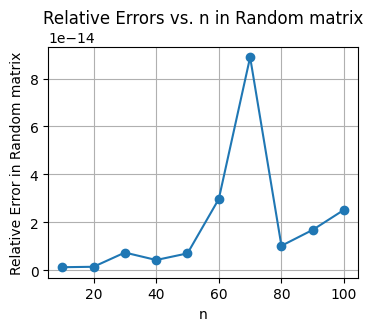

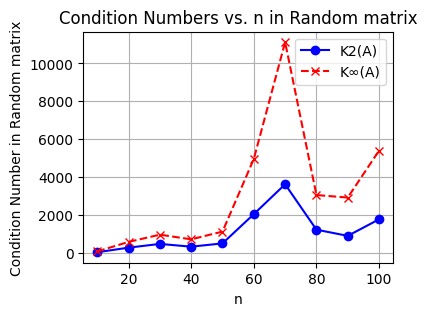

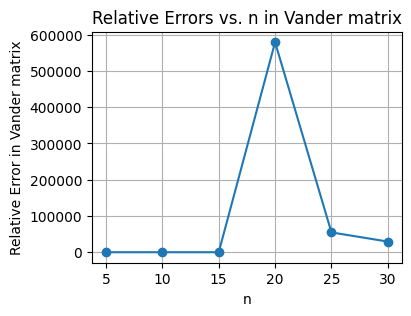

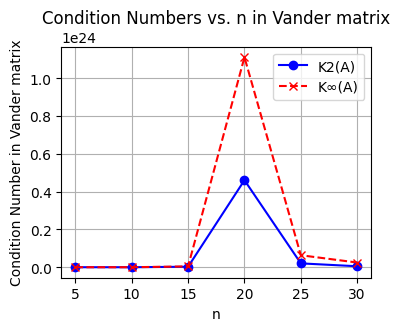

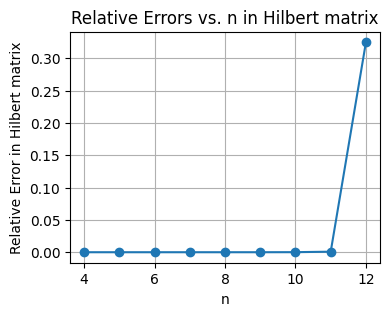

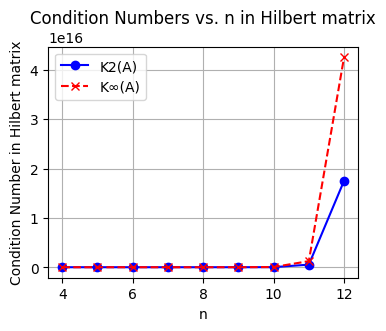

In [5]:
nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
nums2 = [5, 10, 15, 20, 25, 30]
nums3 = [4, 5, 6, 7, 8, 9, 10, 11, 12]

render(nums)
render(nums2, vander=True)
render(nums3, hilbert=True)

In [6]:
eps = 1
while float(1+eps) > 1:
  eps = eps/2
print(decimal.Decimal.from_float(eps*2))

2.220446049250313080847263336181640625E-16


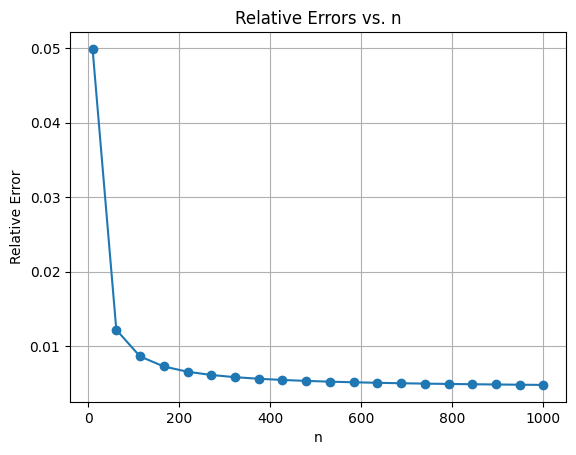

'print(res)\nprint(err)'

In [7]:
##### ES 2.2 ######

res = []
err = []
e = 2.73
nums = np.linspace(10, 1000, 20)

for n in nums:
  a = (1+1/n)**n
  res.append(a)
  err.append((e-a)/e) # ??

plt.figure(1)
plt.plot(nums, err, marker='o', linestyle='-')
plt.title('Relative Errors vs. n')
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.grid(True)
plt.show()

"""print(res)
print(err)"""


In [8]:
##### ES 2.3 ######

A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])
rank_a = np.linalg.matrix_rank(A)
rank_b = np.linalg.matrix_rank(B)
print(rank_a, rank_b)
eigenvalues_a, eigenvectors_a = np.linalg.eig(A)
eigenvalues_b, eigenvectors_b = np.linalg.eig(B)
print(eigenvalues_a, eigenvalues_b)
print(eigenvectors_a)
print(eigenvectors_b)

#Aggiungere matrici di esempio

2 1
[5. 2.] [5. 0.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
